<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/13-1_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5_%EC%9A%A9%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정의

- 머신러닝 > 강화학습
- Reinforcement Learning : RL
- 에이전트가 환경에서 상태에 맞춰서 어떤 행동을 수행할 때, 가장 큰 보상을 받는지 스스로 찾아내는 학습법
- 학습 데이터가 없다
- 시행착오만으로 경험으로 학습하는 방식

## CASE 1

- A씨는 개인 요트를 타고 무동력 세계 일주를 진행하였다. 남태평양 인근에서 난파되어서, 무인도에 도착하였다
- 　=> 미션 : 생존하라(시즌1) 탈출(시즌2)

## 용어정의

  - Agent : A씨 -> 강화학습의 대상
    - 학습의 대상, 보상이 많이 받는 쪽으로 학습되는 주체
  - Environment : 무인도    
    - 환경, 게임의 판대기, 바둑, 장기, 체스, 스타크래프트 -> 게임의 최소한의 룰이 존재한다(어느 정도 개입할 것인지 규칙에 대한 정의가 필요)
  - Policy : 정책
    - 현재 상태에 따라, 다음 행동을 결정하는 기준값
    - 다음 행동을 취하기 위한 전략 -> 에이전트의 판단 기준점
  - Action : 걷는다, 잔다, 사냥한다, 요리한다, ...
    - 에이전트가 환경에서 일으키는 행동, 움직임
  - State : 배고프다, 졸립다, 비가 온다, ...
    - 행동에 따른 환경의 상태, 행동 후 상태는 변경될 수 있다
  - Reward : 물, 음식(동물, 식물)
    - 동일한 행동을 취해도 보상은 다를 수 있다
    - 에이전트는 어떤 보상이 있는지 모른다 -> 경험을 통해 알게 된다    
  - 패널티 : 탈수, 배탈, 타박상, 체력 저하, ...
    - 나쁜 보상, 이런 패널티를 얻는 행동은 자제해야 한다 
  - 이 환경 내에서 각 요소에 대한 정의가 필요


## 보상의 종류

- 즉시 보상
  - 행동 직후, 즉시 적용되는(받게되는) 보상
    - A씨가 휴식을 취하면, 체력이 채워진다

- 지연 보상
  - 미래에 발생할 보상
    - 무인도를 10시간 탐사하였다 -> 경험치 상승 혹은 음식 발견

- 즉시 보상만 탐하면, 차후 발생할 지연 보상을 놓칠 수 있다
- 수익(interset)
  - 수익 = 즉시보상 + 지연보상
  - 수익을 극대화 하기 위해 해당 행동을 강화하는 것 -> 강화학습에 목적

- 가치(Value)
  - 수익은 미래의 결론이다
  - 에이전트의 상태와 정책에 따라서, 조건부로 수익를 계산할 수 있다
  - 어떤 조건에서 가치를 가장 크게 만들어낼 수 있는지 그 조건을 찾아낸다 => 이것을 학습하는 것이다

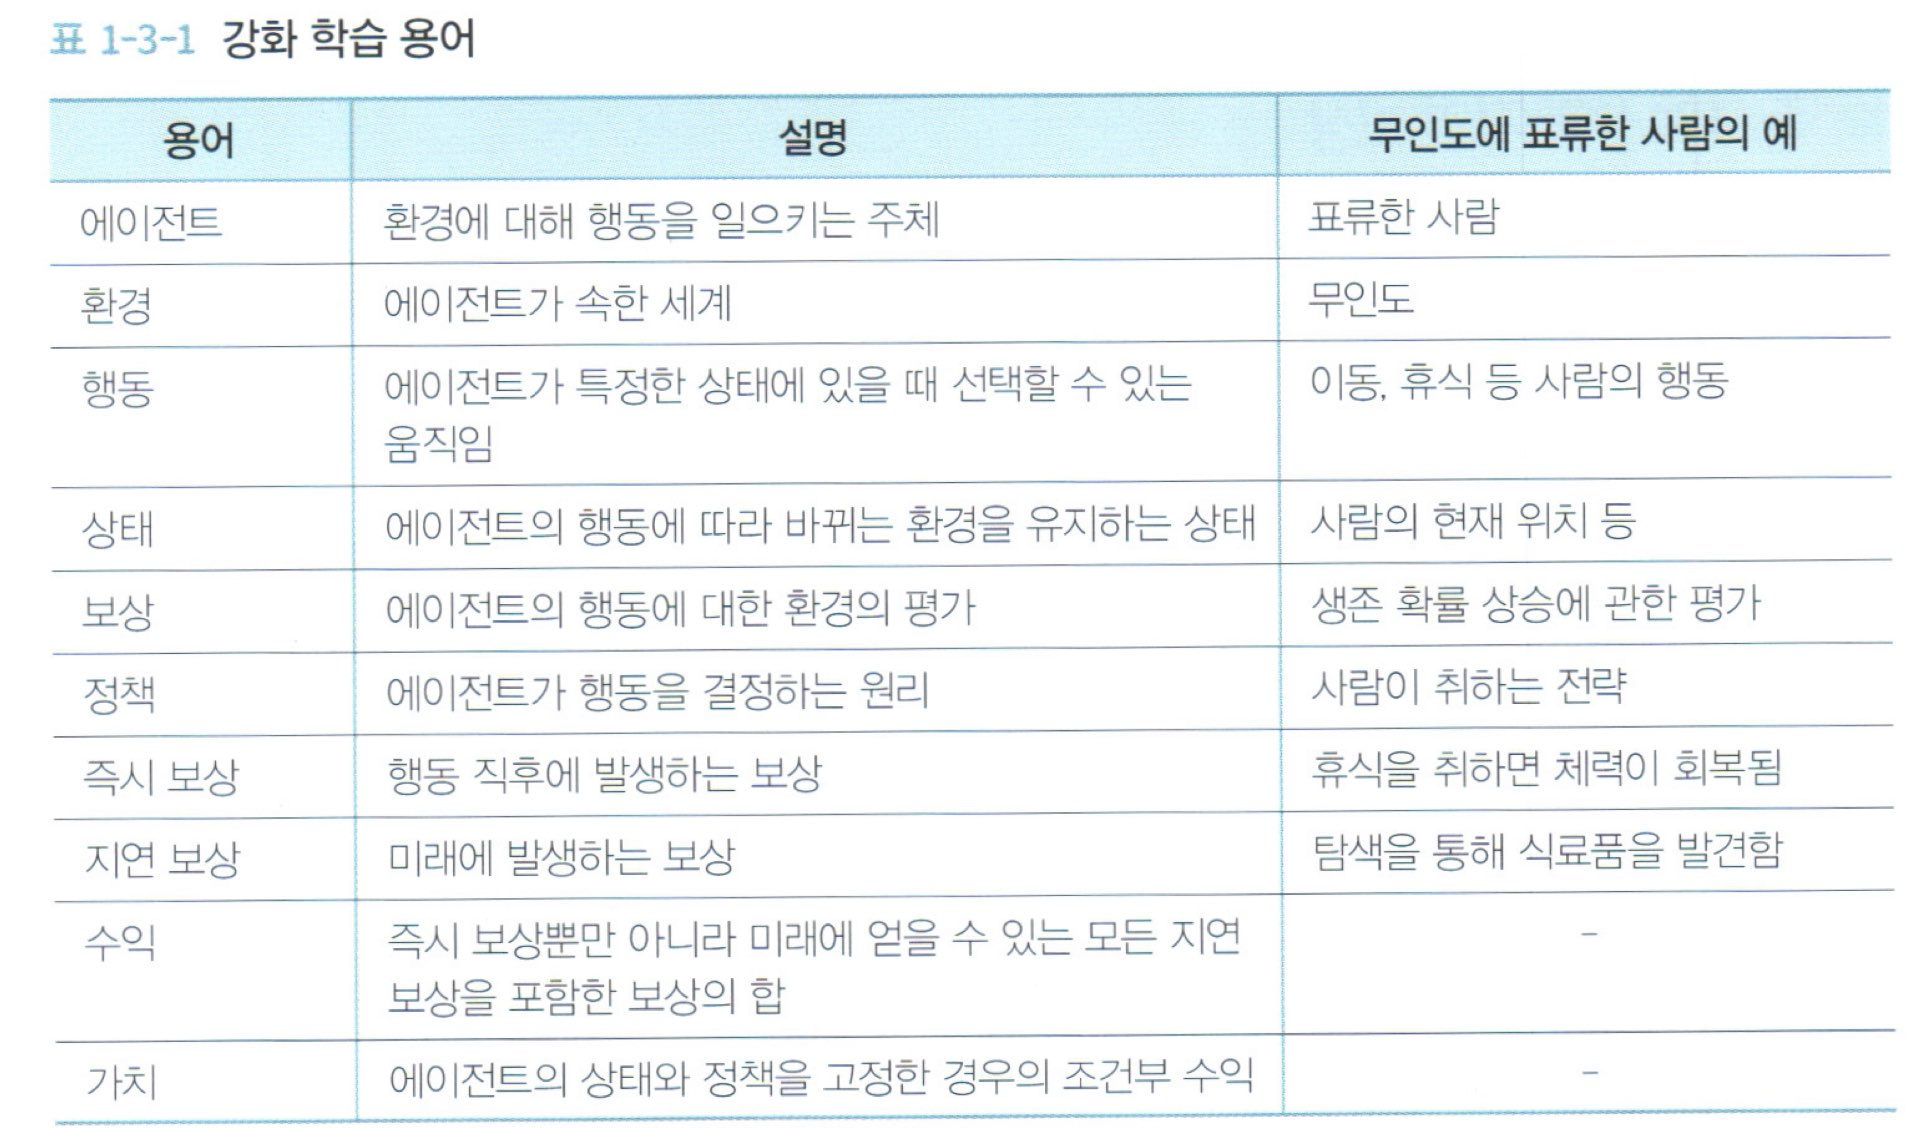

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화1.jpg', width=600)

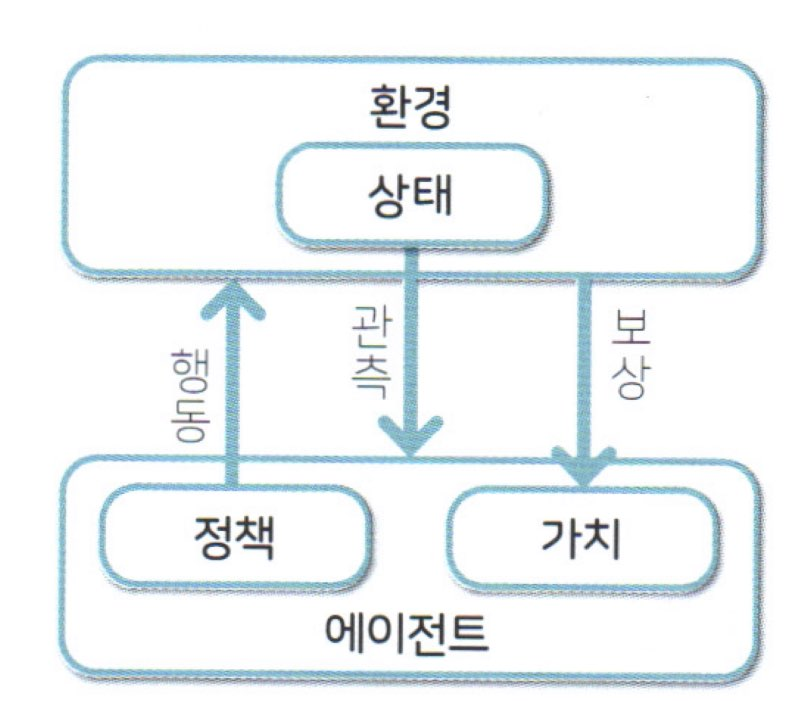

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/강화2.jpg', width=400)

# 학습 전략, 학습 사이클

- 에이전트는 최초에 어떤 행동을 할지 모른다
  - 선택 가능한 행동을 랜덤하게 수행
- 에이전트가 행동의 대가로 보상을 받으면, 어떤 행동을 했더니, 어떤 보상을 받았다라는 기억 -> 경험을 얻게 된다
- 경험을 기반으로 정책을 계산
- 이 과정을 계속 반복
- 게임 종료 시까지 많은 보상을 받을 수 있게 정책을 수정
- 이렇게 학습된 에이전트는 같은 상황이 벌어지면 가장 효율적으로(가장 보상을 많이 받을 수 있게) 행동하여 게임을 종료시킨다

# 마르코프 결정 과정

- 바로 직전에 기술한 내용을 기반으로 수행한 학습 사이클 자체를 의미
- MDP(Markov Decision Process)
- 현재 상태에서 선택한 행동에 따라, 다음 상황이 확정되는 시스템

# 에피소드 : Episode

- 게임 종료 시 진행되는 학습 분량
- 게임 종료 => 한개의 에피소드가 끝났다

# Step : 스텝


- 1회 행동 분량-> 1 step

# 정책 계산 방법

## 정책 반복법 (Policy Iteration)

- 보상을 받으면 행동이 성공적이였다고 라고 말할수 있고, 이때 선택한 행동을 중시하는 전략
  - 행동을 많이 수행
    - 이것을 통해서 정책을 계산(갱신)
      - 정책 경사법(알고리즘)

## 가치 반복법  (Value Iteration)

- 다음 상태의 가치와, 현재 상태의 가치의 차이를 계산
  - 두 가치의 차이만큼 현재 상태의 가치를 늘리는 기법
    - 알고리즘
      - Sarsa(살사)
      - Q Learning(큐러닝)
      - DQN(딥마인드에서 제작)
        - 하위 파생 알고리즘이 많다